In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

In [29]:
#importing standardized dataset

df=pd.read_csv('cluster_data.xls')
df.head()

,x1,x2,x3,x4,x5,x6
0,1.868873,-10.463549,0.674638,0.912393,-0.003039,-2.202443
1,-0.137840,5.363186,-0.444914,4.125290,0.002185,-6.643935
2,1.051263,-7.977121,-1.926635,1.195411,0.017575,-6.092424
3,1.426620,-10.728448,-0.062891,2.053938,0.001306,-4.519171
4,1.841122,-4.068528,-0.493864,3.354350,-0.014658,4.857383


In [30]:
df.count()

x1    4000
x2    4000
x3    4000
x4    4000
x5    4000
x6    4000
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4000 non-null   float64
 1   x2      4000 non-null   float64
 2   x3      4000 non-null   float64
 3   x4      4000 non-null   float64
 4   x5      4000 non-null   float64
 5   x6      4000 non-null   float64
dtypes: float64(6)
memory usage: 187.6 KB


In [32]:
#checking the description of my dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,4000.0,0.007323,1.153280,-1.999455,-0.967182,0.012657,1.010276,1.999196
x2,4000.0,-1.443023,5.178397,-12.533442,-4.876779,-1.006104,3.008330,7.514683
x3,4000.0,0.205024,0.984557,-3.166847,-0.460798,0.208712,0.878235,3.453225
x4,4000.0,1.975673,0.983769,-1.459410,1.303067,1.985659,2.646516,5.681363
x5,4000.0,-0.000081,0.010011,-0.036346,-0.006835,0.000030,0.006761,0.037306
x6,4000.0,4.541545,11.556712,-15.799297,-4.729720,-0.599134,9.076892,42.187483


In [33]:
#checking the sum of null values

df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

In [36]:
#reducing the number of dimensions

pca=PCA()
pca_data=pca.fit_transform(df)
pca_data

array([[-7.17787464e+00,  8.76358600e+00,  1.36151038e+00,
        -1.10755513e+00,  5.14803822e-01, -2.73589280e-03],
       [-1.08482334e+01, -7.35420114e+00,  2.43582450e-01,
         1.70182740e+00, -1.33408394e+00,  1.35930060e-03],
       [-1.09345285e+01,  6.05834879e+00,  9.62290359e-01,
         1.25464329e+00,  1.80297043e+00,  1.77132689e-02],
       ...,
       [ 1.33551472e+01, -1.66408791e+00, -1.80764304e+00,
        -1.98752551e-01, -8.57111691e-01,  2.63679206e-02],
       [ 9.38503087e+00, -9.30376221e-01, -1.37983144e+00,
        -2.25425881e+00, -2.33605245e-01,  2.82648546e-03],
       [ 1.53485075e+01,  3.65109182e-01, -4.01091635e-01,
        -5.37268753e-01,  1.50444388e+00,  1.37082883e-02]])

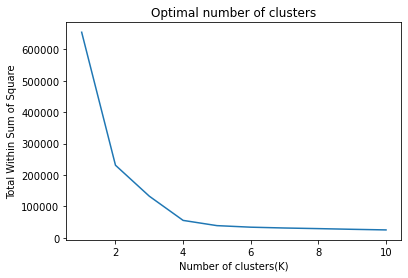

*From the chart we can see that the optimal number of k clusters is 4*


In [44]:
#finding the number of clusters using the Elbow method

WSS=[]
clusters=range(1,11)

for cluster in clusters:
    kmeans=KMeans(n_clusters=cluster, random_state=None)
    kmeans=kmeans.fit(df)
    WSS.append(kmeans.inertia_)
    
plt.plot(clusters,WSS)
plt.xlabel("Number of clusters(K)")
plt.ylabel("Total Within Sum of Square")
plt.title("Optimal number of clusters")
plt.show()

print("*From the chart we can see that the optimal number of k clusters is 4*")

In [ ]:
#finding the number of clusters using Silhouette score
